In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_excel("D:\\Ds\\projects\\excelR clustering\\artifacts\\World_development_mesurement (1) (1).xlsx")

In [4]:
df.sample(5)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
1775,0.010,NaN,NaN,Liechtenstein,NaN,NaN,NaN,"$4,929,414,915",NaN,NaN,NaN,NaN,0.7,NaN,86.0,80.0,1.0,1,NaN,NaN,NaN,35582,0.146,NaN,NaN
1941,0.025,59.4%,6480.0,Kyrgyz Republic,11.0,NaN,2484.0,"$4,690,062,255",0.068,$61,202.0,0.029,0.2,0.230,73.0,65.0,0.9,1,0.301,0.653,0.046,5383300,0.353,"$506,000,000","$393,000,000"
1617,0.028,27.5%,154.0,Tonga,32.0,NaN,58.0,"$301,064,027",0.069,$205,164.0,0.013,0.1,0.122,75.0,69.0,0.5,1,0.379,0.561,0.060,102289,0.232,"$15,200,000","$19,200,000"
2384,0.010,48.1%,NaN,Czech Republic,20.0,NaN,43429.0,"$216,061,200,559",0.075,"$1,545",557.0,0.003,0.7,0.057,81.0,75.0,1.2,1,0.143,0.699,0.158,10496088,0.732,"$8,503,000,000","$4,660,000,000"
1929,0.021,40.8%,389.0,Bhutan,46.0,NaN,NaN,"$1,264,758,198",0.046,$82,274.0,0.036,0.1,0.138,67.0,66.0,0.5,1,0.305,0.651,0.044,704542,0.340,"$51,000,000","$34,000,000"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [6]:
df.shape

(2704, 25)

##  Issues with data

- **Birth Rate** 
    - 4.5% missing values
- **Business Tax Rate** 
    - 47% missing values
    - Incorrect datatype
    - 25% values above 50% tax and max value 339%
- **CO2 Emissions**
    - 21% missing values
- **GDP**
    - 7.7% missing values
    - Incorrect datatype(contains $ and ,)


In [7]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [8]:
df.duplicated().sum()

0

No Duplicate Rows

In [9]:
df["Country"].nunique()

208

In [10]:
df["Country"].value_counts()

Country
Algeria                           13
Angola                            13
Turkey                            13
Ukraine                           13
United Kingdom                    13
Bahrain                           13
Iran, Islamic Rep.                13
Iraq                              13
Israel                            13
Jordan                            13
Kuwait                            13
Lebanon                           13
Oman                              13
Qatar                             13
Saudi Arabia                      13
Syrian Arab Republic              13
United Arab Emirates              13
Yemen, Rep.                       13
American Samoa                    13
Australia                         13
Fiji                              13
French Polynesia                  13
Guam                              13
Kiribati                          13
Marshall Islands                  13
Switzerland                       13
Sweden                        

In the dataset there are total 208 Unique Countries

Also Value Count of Each Country is 13, 13*208 = 2704 ,which is the exact number of rows in the dataset

this suggest that for each Country the data is collected for 13 years

The Dataset is subdivided into 13 subsets where each subset represent 1 year and each year contains information of all the 208 Countries

In [11]:
for i,j in enumerate(range(2000,2013)):
    df.loc[208*i:208*(i+1) , "year"] = j

The Time Frame has been Confirmed from Multiple Reputted Sources like World Bank Data and UN Data 

In [12]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,year
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,0.034,0.0,0.100,71.0,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000",2000.0
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,0.128,0.0,1.032,47.0,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000",2000.0
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,0.090,0.0,NaN,57.0,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000",2000.0
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,0.054,0.0,0.155,52.0,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000",2000.0
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,0.096,0.0,NaN,52.0,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000",2000.0


In [13]:
df1 = df.copy()

In [14]:
df1.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,year
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,0.034,0.0,0.100,71.0,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000",2000.0
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,0.128,0.0,1.032,47.0,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000",2000.0
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,0.090,0.0,NaN,57.0,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000",2000.0
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,0.054,0.0,0.155,52.0,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000",2000.0
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,0.096,0.0,NaN,52.0,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000",2000.0


Changing the dtypes for required columns

In [15]:
df1["Business Tax Rate"] = df["Business Tax Rate"].str.rstrip("%").astype("float")
df1["Business Tax Rate"].dtype

dtype('float64')

Removing **'$'** sign and **','** from the columns that convey monetary values

In [16]:
currency_cols = ["GDP", "Health Exp/Capita", "Tourism Inbound", "Tourism Outbound"]

In [17]:
for i in currency_cols:
    df1[i] = pd.to_numeric(df1[i].str.replace("$","").str.replace(",",""))
df1.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,year
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,0.034,0.0,0.100,71.0,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0,2000.0
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,0.128,0.0,1.032,47.0,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0,2000.0
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,0.090,0.0,NaN,57.0,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0,2000.0
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,0.054,0.0,0.155,52.0,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0,2000.0
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2.610959e+09,0.051,12.0,NaN,0.096,0.0,NaN,52.0,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0,2000.0


stats_df = pd.DataFrame(columns = df1.describe().columns )
for i in (df1["Country"].unique()):
    country_stats = df1[df1["Country"] == i ].describe().reset_index() 
    country_stats.loc[:, "Country"] = i
    stats_df = pd.concat([stats_df, country_stats], axis = 0, ignore_index=False)

Dropping **Ease of Business**, **Number of Records** columns as Ease of business has 93% NaN values and Number of record has same value for all the rows which results in 0 variance which will not contribute to the model

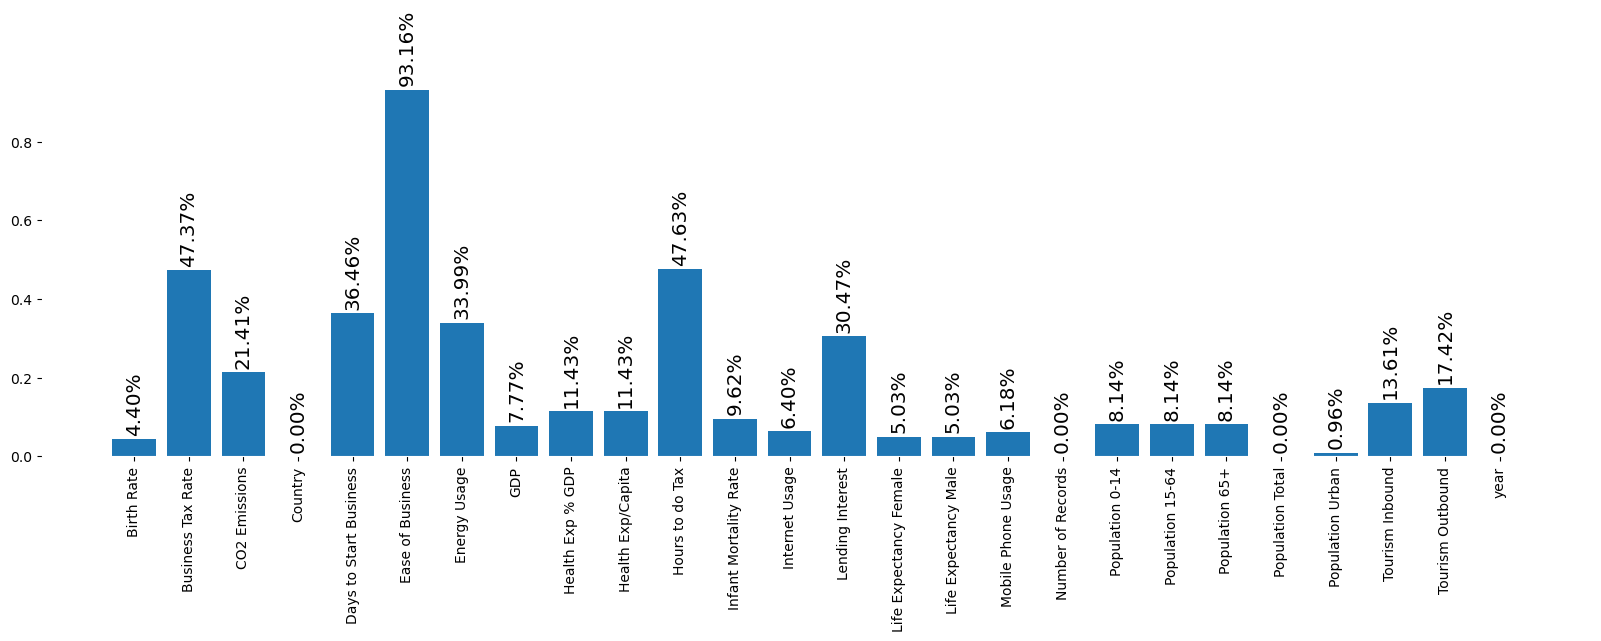

In [18]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(df1.isna().sum().index,df1.isna().sum() / df1.shape[0],)
plt.xticks(rotation =90)
for i, value in enumerate(df1.isna().sum() / df1.shape[0]):
    plt.text(i, value + 0.01, f'{value:.2%}', ha='center', va='bottom', rotation=90, fontsize="x-large")
ax.spines[["top", "right", "left"]].set_color('w')
ax.spines["bottom"].set_color("w")

In [19]:
df1.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,year
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03,2704.000000
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,801.397077,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09,2006.000000
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,1473.448036,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10,3.742349
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05,2000.000000
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,50.000000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08,2003.000000
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,193.000000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08,2006.000000
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,665.000000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09,2009.000000
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11,2012.000000


In [20]:
df1.describe(include="O")

,Country
count,2704
unique,208
top,Algeria
freq,13


Using backfill and forwardfill to fill the missing values in the data as this dataset contains 13 years of information which shows a trend in the data and most columns doesnt change over 1 or 2 years significantly for each individual country 

In [21]:
bfillcolumn = ["Birth Rate", "Business Tax Rate", "CO2 Emissions", "Days to Start Business", "Energy Usage", "GDP", "Health Exp % GDP",
              "Health Exp/Capita", "Hours to do Tax","Infant Mortality Rate", "Internet Usage", "Lending Interest", 
               "Life Expectancy Female", "Life Expectancy Male", "Mobile Phone Usage", "Tourism Inbound", "Tourism Outbound"]

In [22]:
df1[bfillcolumn] = df1.groupby("Country")[bfillcolumn].transform(lambda x: x.bfill().ffill())

In [23]:
num_columns = [i for i in df1.columns if df1[i].dtype != "O"]

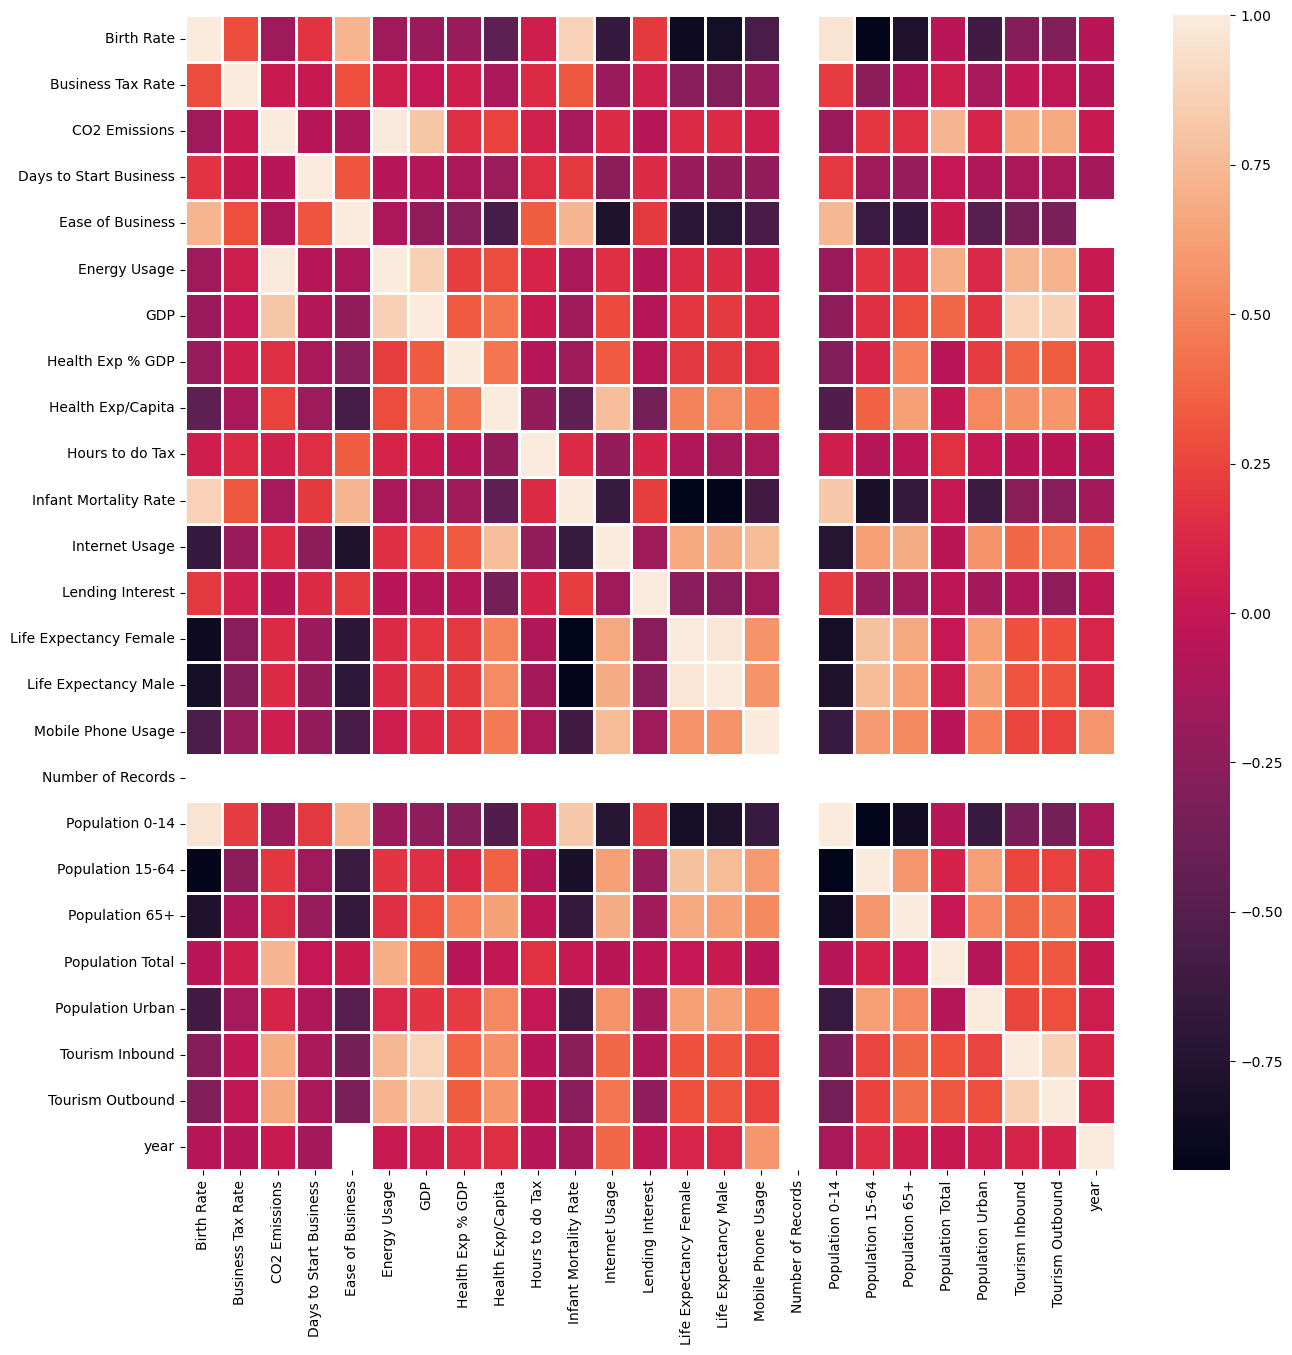

In [24]:
fig , ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(df1[num_columns].corr() ,linewidths=1, 
                      linecolor='white', cbar=True, );


In [25]:
population_columns = df1[["Country",'Population 0-14','Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban']].copy()

In [26]:
df1.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,year
0,0.020,76.9,87931.0,Algeria,25.0,NaN,26998.0,5.479006e+10,0.035,60.0,451.0,0.034,0.0,0.100,71.0,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0,2000.0
1,0.050,52.1,9542.0,Angola,119.0,NaN,7499.0,9.129595e+09,0.034,22.0,272.0,0.128,0.0,1.032,47.0,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0,2000.0
2,0.043,75.7,1617.0,Benin,32.0,NaN,1983.0,2.359122e+09,0.043,15.0,270.0,0.090,0.0,NaN,57.0,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0,2000.0
3,0.027,17.1,4276.0,Botswana,107.0,NaN,1836.0,5.788312e+09,0.047,152.0,140.0,0.054,0.0,0.155,52.0,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0,2000.0
4,0.046,47.5,1041.0,Burkina Faso,40.0,NaN,NaN,2.610959e+09,0.051,12.0,270.0,0.096,0.0,NaN,52.0,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0,2000.0


In [27]:
df1 = df1.drop(columns =["Ease of Business", "Number of Records",])

In [28]:
clean_df =df1.copy()

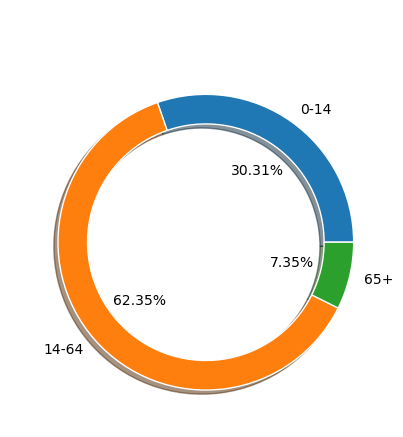

In [29]:

total_pop1 = df1["Population Total"].sum() 
pop_0_141 = df1["Population 0-14"].sum()
pop_15_641 = df1["Population 15-64"].sum()
pop_64_up1 = df1["Population 65+"].sum()
plt.suptitle("Proportion of Age group in Global Population ", color="w")

plt.pie([ pop_0_141, pop_15_641, pop_64_up1], autopct ="%.2f%%", labels = [ "0-14", "14-64", '65+'],
       wedgeprops={'width':0.2, 'edgecolor':"w"}, 
       shadow=True,);

    


we will use these proportion to fill the column Population 0-14, 15-64, 65+

In [30]:
import random


random_float = random.uniform(0.6, 0.65)
random_float2 = random.uniform(0.3, 0.35)
1-random_float2-random_float

0.05728359818435025

In [31]:
random_float2, random_float

(0.30987295571839474, 0.632843446097255)

In [32]:
clean_df["Population 0-14"] = np.where(clean_df["Population 0-14"].isna(), random.uniform(0.3, 0.35), clean_df["Population 0-14"])
clean_df["Population 15-64"] = np.where(clean_df["Population 15-64"].isna(), random.uniform(0.6, 0.65), clean_df["Population 15-64"])
clean_df["Population 65+"] = np.where(clean_df["Population 65+"].isna(), 
                                 1-clean_df["Population 0-14"]- clean_df["Population 15-64"], clean_df["Population 65+"])

In [33]:
df["Population 0-14"].mean()  , df1["Population 15-64"].mean() , df1["Population 65+"].mean()

(0.3030511272141707, 0.6234814814814815, 0.07346457326892109)

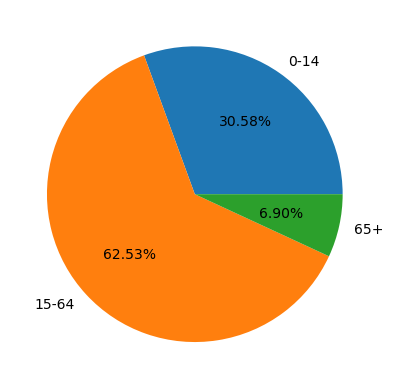

In [34]:
plt.pie([clean_df['Population 0-14'].mean(), clean_df["Population 15-64"].mean(), clean_df["Population 65+"].mean()], 
        autopct="%.2f%%", labels =["0-14","15-64","65+"]);

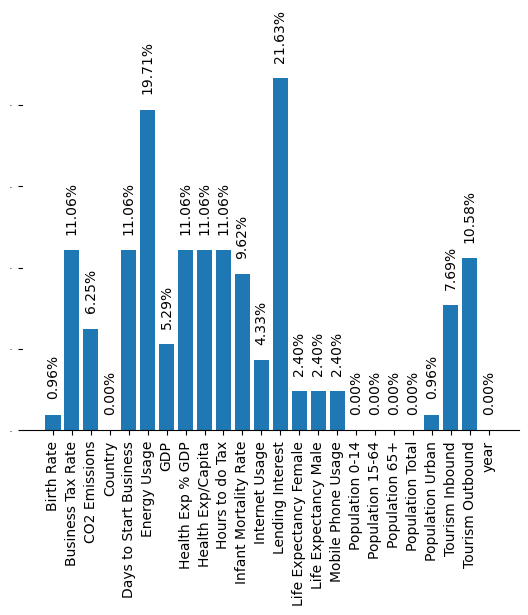

In [35]:
fig, ax = plt.subplots()
ax.bar(clean_df.isna().sum().index,clean_df.isna().sum() / clean_df.shape[0], )
plt.xticks(rotation=90)
plt.yticks(fontsize=0)


for i, value in enumerate(clean_df.isna().sum() / clean_df.shape[0]):
    plt.text(i, value + 0.01, f'{value:.2%}', ha='center', va='bottom', rotation=90,)
ax.spines[["top", "right", "left"]].set_color('w')

In [36]:
df[['Population 0-14','Population 15-64', 'Population 65+','Population Total']].describe()

,Population 0-14,Population 15-64,Population 65+,Population Total
count,2484.000000,2484.000000,2484.000000,2.704000e+03
mean,0.303051,0.623481,0.073465,3.145729e+07
std,0.106577,0.069660,0.049541,1.242894e+08
min,0.118000,0.474000,0.003000,1.887600e+04
25%,0.204750,0.559000,0.033000,8.783360e+05
50%,0.299500,0.642500,0.052000,5.800324e+06
75%,0.402000,0.676000,0.112000,2.014089e+07
max,0.500000,0.858000,0.244000,1.350695e+09


In [37]:
clean_df[['Population 0-14','Population 15-64', 'Population 65+','Population Total']].describe()

,Population 0-14,Population 15-64,Population 65+,Population Total
count,2704.000000,2704.000000,2704.000000,2.704000e+03
mean,0.305784,0.625262,0.068951,3.145729e+07
std,0.102560,0.067033,0.049846,1.242894e+08
min,0.118000,0.474000,0.003000,1.887600e+04
25%,0.210000,0.565000,0.031000,8.783360e+05
50%,0.312000,0.645368,0.048000,5.800324e+06
75%,0.395000,0.673000,0.105000,2.014089e+07
max,0.500000,0.858000,0.244000,1.350695e+09


Here we can see that the Population column now has 0 missing values also these imputation has not changed te over all distribution of these columns

In [38]:
from sklearn. model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

we will try to impute Birth rate using Random forest Regressor While keeping Birth rate as Target And columns Correlated to it as input Features

"Population 0-14", "Population 15-64", 'Population 65+', 'Population Total'

These are the column that are correlated to birth rate and has 0 missing values

In [39]:
train = clean_df[clean_df["Birth Rate"].notna()]
X = train[["Population 0-14", "Population 15-64", 'Population 65+', 'Population Total']]
y = train["Birth Rate"]

X_tain, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc= StandardScaler()
sclaed_train  = sc.fit_transform(X_tain)
scaled_test = sc.transform(X_test)

rfg = RandomForestRegressor()
rfg.fit(sclaed_train, y_train)
pred = rfg.predict(scaled_test)


print(r2_score(pred, y_test))

print(cross_val_score(rfg ,sclaed_train, y_train, cv=5, scoring="neg_mean_squared_error").mean())
print(rfg.feature_importances_)

0.9770718850132054
-3.0548125560490396e-06
[0.91753053 0.02572961 0.01860034 0.03813952]


<BarContainer object of 4 artists>

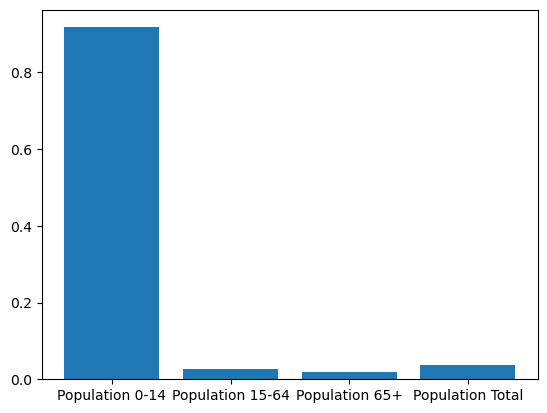

In [40]:
plt.bar(X.columns, rfg.feature_importances_)

we will remove the population 15-64 to again check the results

In [41]:
train1 = clean_df[clean_df["Birth Rate"].notna()]
X1 = train1[["Population 0-14",  'Population 65+', 'Population Total']]
y1 = train1["Birth Rate"]

X_tain1, X_test1, y_train1 , y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

sc= StandardScaler()
sclaed_train1  = sc.fit_transform(X_tain1)
scaled_test1 = sc.transform(X_test1)

rfg1 = RandomForestRegressor()
rfg1.fit(sclaed_train1, y_train1)
pred1 = rfg1.predict(scaled_test1)


print(r2_score(pred1, y_test1))

print(cross_val_score(rfg1,sclaed_train1, y_train1, cv=10, scoring="neg_mean_squared_error").mean())
print(rfg1.feature_importances_)


0.9791057567820143
-2.6707003326860057e-06
[0.93738766 0.01928368 0.04332866]


as we can see there isnt much difference in the r2 score and even the cross val score is suggesting that our odel is good to predict Birth rate using population realted columns

In [42]:
null_birthrate_rows = clean_df[clean_df["Birth Rate"].isna()]
pred_ = rfg1.predict(sc.transform(null_birthrate_rows[["Population 0-14", 'Population 65+', 'Population Total']]))

In [43]:
clean_df.loc[df1["Birth Rate"].isna(), "Birth Rate"] = pred_

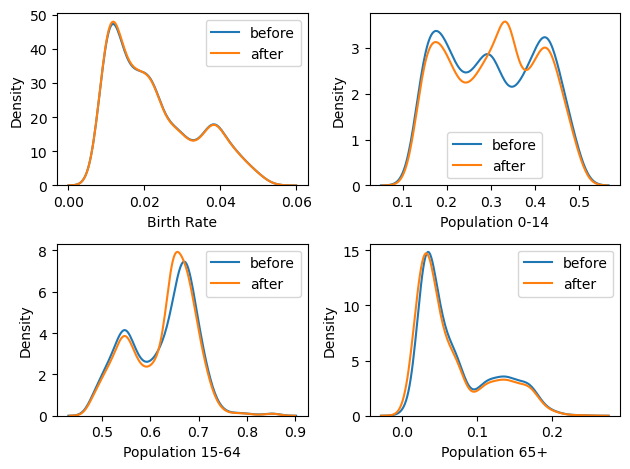

In [44]:

for i, j in enumerate(["Birth Rate","Population 0-14","Population 15-64", 'Population 65+']):
    plt.subplot(2,2,i+1)
    sns.kdeplot(df1[j], label="before")
    sns.kdeplot(clean_df[j], label="after")
    plt.legend()
plt.tight_layout()

In [45]:
threshold = 70 
missing_percentage = df[df.isnull().any(axis=1)].isnull().mean(axis=1) * 100
rows_to_drop = missing_percentage[missing_percentage >= threshold].index
df_missing_rows = df.loc[rows_to_drop]
(df_missing_rows["Country"].value_counts())


Country
American Samoa               13
St. Martin (French part)     13
Turks and Caicos Islands     13
Isle of Man                  12
Sint Maarten (Dutch part)    10
Name: count, dtype: int64

In [46]:
threshold = 55 
missing_percentage = df1[df1.isnull().any(axis=1)].isnull().mean(axis=1) * 100
rows_to_drop = missing_percentage[missing_percentage >= threshold].index
df_missing_rows = df1.loc[rows_to_drop]
(df_missing_rows["Country"].value_counts())

Country
Isle of Man                  13
Liechtenstein                13
Monaco                       13
American Samoa               13
Cayman Islands               13
Sint Maarten (Dutch part)    13
St. Martin (French part)     13
Turks and Caicos Islands     13
Name: count, dtype: int64

In [47]:
countries_todrop = ['St. Martin (French part)', 'St. Martin (French part)', 'Turks and Caicos Islands','Isle of Man', 'Sint Maarten (Dutch part)']


In [48]:
clean_df = clean_df[~clean_df["Country"].isin(countries_todrop)]

Only Kosovo was the country which has population urban and Mobile phone usage were nUll so be imputed it with Global median of these columns

In [49]:
clean_df.loc[clean_df["Mobile Phone Usage"].isna(),"Mobile Phone Usage"] = clean_df[clean_df["Mobile Phone Usage"].isna()].fillna(clean_df["Mobile Phone Usage"].median())
clean_df.loc[clean_df["Population Urban"].isna(),"Population Urban"] = clean_df[clean_df["Population Urban"].isna()].fillna(clean_df["Population Urban"].median())

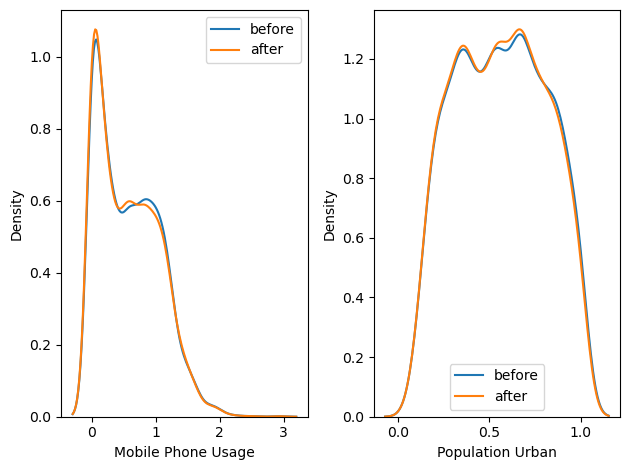

In [50]:
for i, j in enumerate(["Mobile Phone Usage","Population Urban"]):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df[j], label="before")
    sns.kdeplot(clean_df[j], label="after")
    plt.legend()
plt.tight_layout()

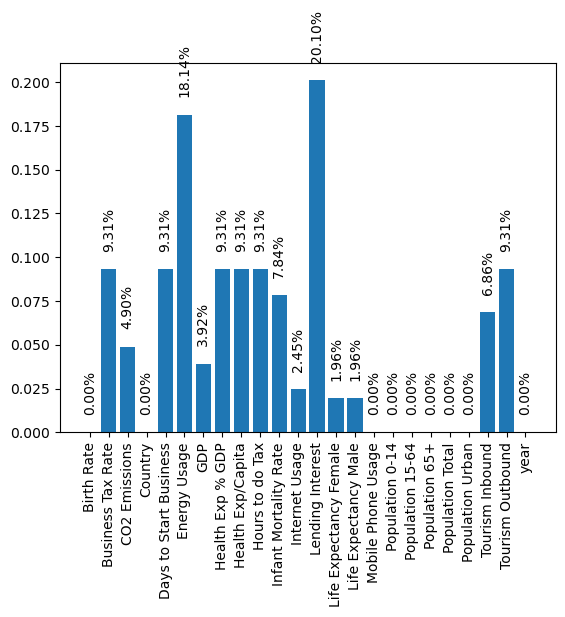

In [51]:
plt.bar(clean_df.isna().sum().index,clean_df.isna().sum() / clean_df.shape[0])
plt.xticks(rotation=90)
for i, value in enumerate(clean_df.isna().sum() / clean_df.shape[0]):
    plt.text(i, value + 0.01, f'{value:.2%}', ha='center', va='bottom', rotation=90)

now we will try to fill life expetentacy of male and female using random forest

In [52]:
impution = clean_df[clean_df[["Life Expectancy Male", "Life Expectancy Female"]].notna().all(axis=1)]
impution = impution[["Birth Rate","Life Expectancy Male", "Life Expectancy Female", "Population 15-64", 'Population Urban', 
          "Population 0-14","Mobile Phone Usage",'Infant Mortality Rate']]
impution = impution[impution["Infant Mortality Rate"].isna()]

In [53]:
num_columns.remove('Ease of Business')

In [54]:
num_columns.remove('Number of Records')
num_columns

['Birth Rate',
 'Business Tax Rate',
 'CO2 Emissions',
 'Days to Start Business',
 'Energy Usage',
 'GDP',
 'Health Exp % GDP',
 'Health Exp/Capita',
 'Hours to do Tax',
 'Infant Mortality Rate',
 'Internet Usage',
 'Lending Interest',
 'Life Expectancy Female',
 'Life Expectancy Male',
 'Mobile Phone Usage',
 'Population 0-14',
 'Population 15-64',
 'Population 65+',
 'Population Total',
 'Population Urban',
 'Tourism Inbound',
 'Tourism Outbound',
 'year']

In [55]:
imputation_index = impution.index

<Axes: >

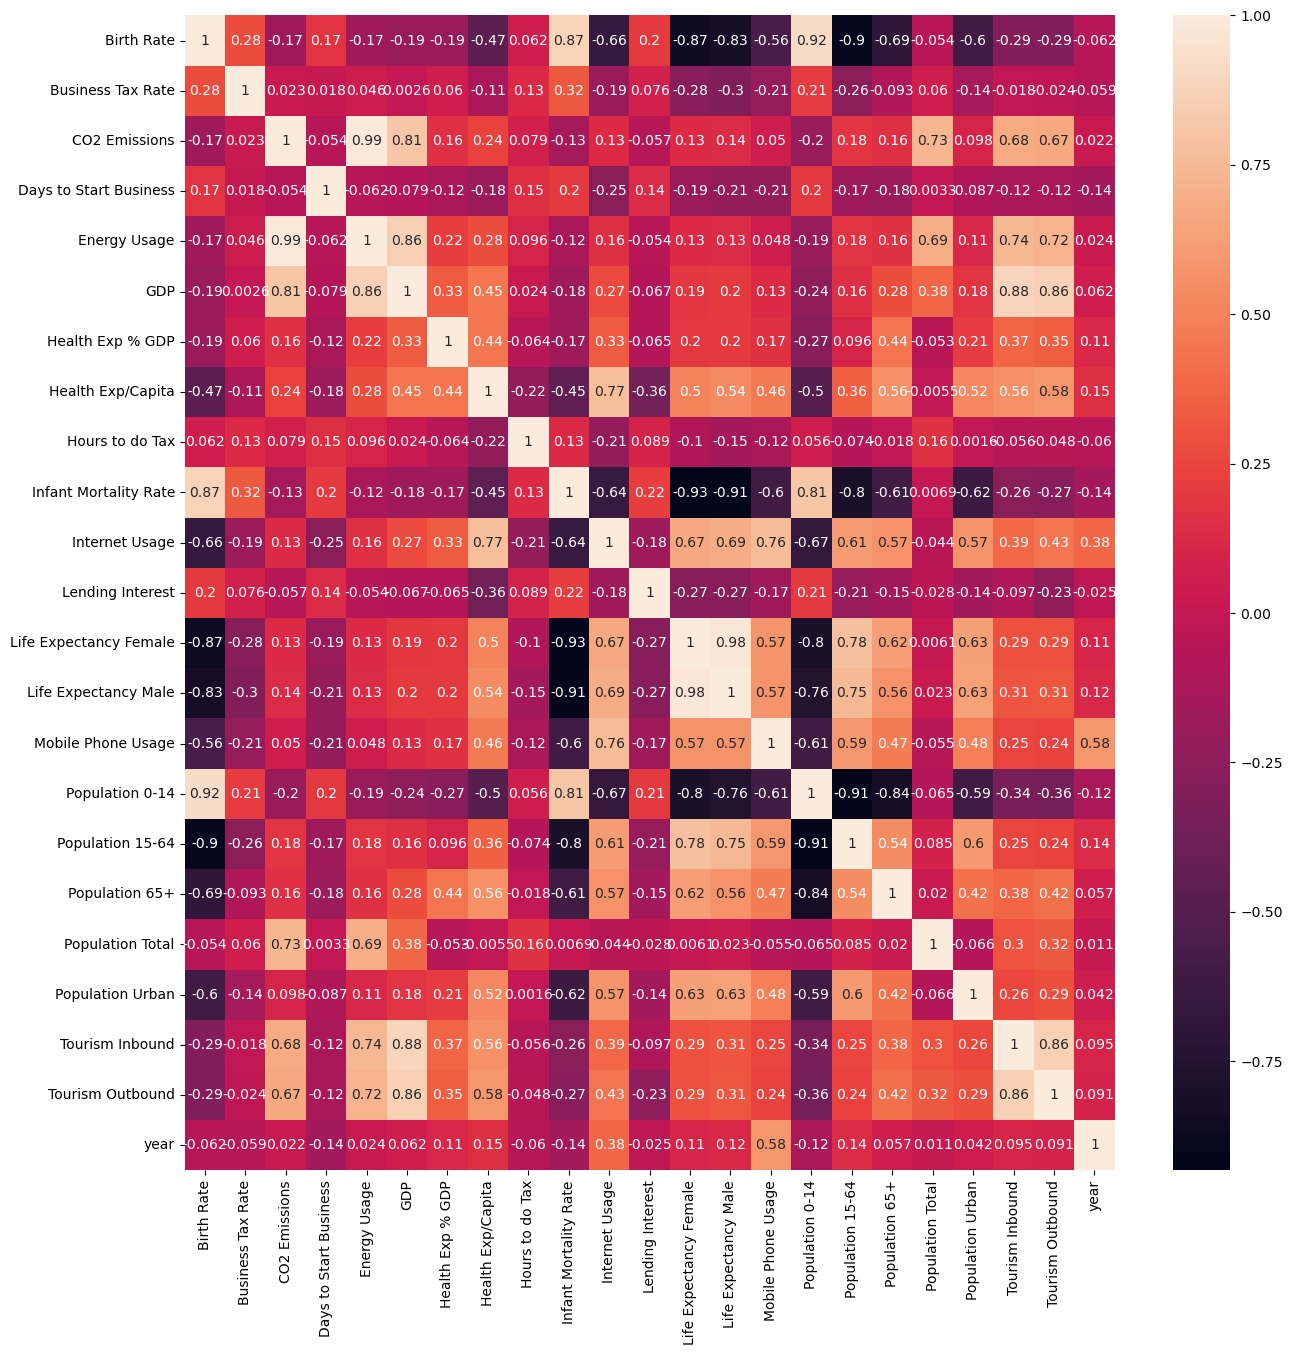

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(clean_df[num_columns].corr(), annot=True)

In [57]:
train = clean_df[clean_df[["Infant Mortality Rate","Life Expectancy Male", "Life Expectancy Female"]].notna().all(axis=1)]
X = train[["Birth Rate","Life Expectancy Male", "Life Expectancy Female", "Population 15-64", 'Population Urban', 
           "Population 0-14","Mobile Phone Usage"]]
y = train["Infant Mortality Rate"]

X_tain, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc= StandardScaler()
sclaed_train  = sc.fit_transform(X_tain)
scaled_test = sc.transform(X_test)

rfg = RandomForestRegressor()
rfg.fit(sclaed_train, y_train)
pred = rfg.predict(scaled_test)


print("R2 on testing set", r2_score(pred, y_test))
print("R2 on training set",r2_score(rfg.predict(sclaed_train), y_train))

print("Cross val Score", cross_val_score(rfg ,sclaed_train, y_train, cv=5, scoring="neg_mean_squared_error").mean())
print("feature importance",rfg.feature_importances_)


R2 on testing set 0.9796731815206967
R2 on training set 0.9968639094745193
Cross val Score -2.2780111705033002e-05
feature importance [0.02764716 0.03306273 0.87515532 0.0127009  0.02963975 0.01258118
 0.00921295]


In [58]:
clean_df.loc[imputation_index, "Infant Mortality Rate"] = rfg.predict(sc.transform(impution.drop("Infant Mortality Rate", axis = 1)))

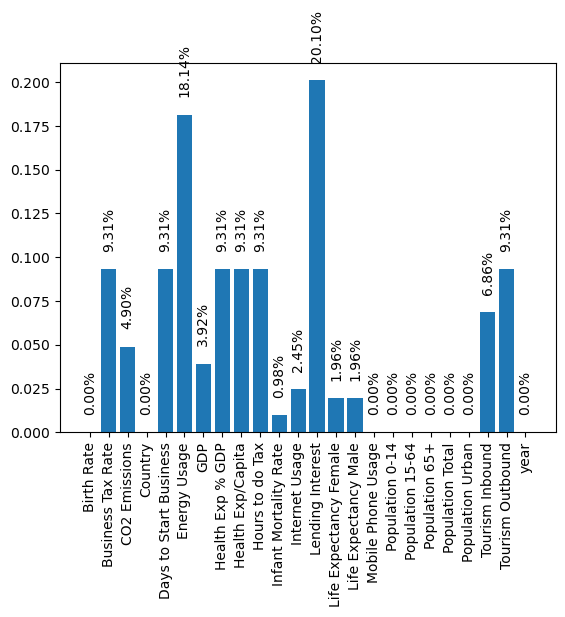

In [59]:
plt.bar(clean_df.isna().sum().index,clean_df.isna().sum() / clean_df.shape[0])
plt.xticks(rotation=90)

for i, value in enumerate(clean_df.isna().sum() / clean_df.shape[0]):
    plt.text(i, value + 0.01, f'{value:.2%}', ha='center', va='bottom', rotation=90)

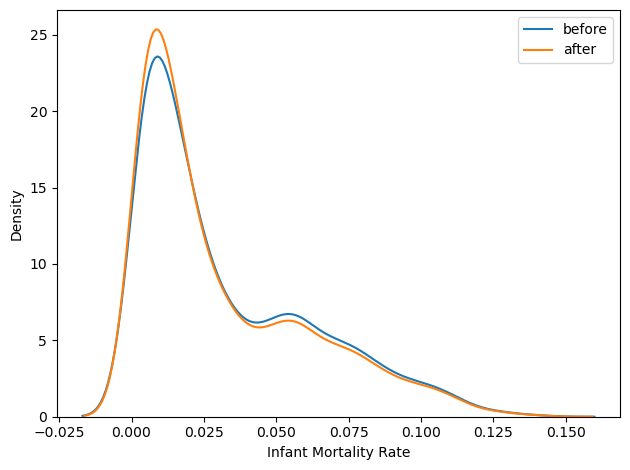

In [60]:

sns.kdeplot(df["Infant Mortality Rate"], label="before")
sns.kdeplot(clean_df["Infant Mortality Rate"], label="after")

plt.legend()
plt.tight_layout()

In [61]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2652 entries, 0 to 2703
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2652 non-null   float64
 1   Business Tax Rate       2405 non-null   float64
 2   CO2 Emissions           2522 non-null   float64
 3   Country                 2652 non-null   object 
 4   Days to Start Business  2405 non-null   float64
 5   Energy Usage            2171 non-null   float64
 6   GDP                     2548 non-null   float64
 7   Health Exp % GDP        2405 non-null   float64
 8   Health Exp/Capita       2405 non-null   float64
 9   Hours to do Tax         2405 non-null   float64
 10  Infant Mortality Rate   2626 non-null   float64
 11  Internet Usage          2587 non-null   float64
 12  Lending Interest        2119 non-null   float64
 13  Life Expectancy Female  2600 non-null   float64
 14  Life Expectancy Male    2600 non-null   float

In [62]:
df["Business Tax Rate"]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48         NaN
49         NaN
50         NaN
51         NaN
52         NaN
53         NaN
54         NaN
55         NaN
56         NaN
57         NaN
58         NaN
59         NaN
60         NaN
61         NaN
62         NaN
63         NaN
64         NaN
65         NaN
66        

In [63]:
df1["Business Tax Rate"]

0        76.9
1        52.1
2        75.7
3        17.1
4        47.5
5       279.7
6        50.6
7        65.7
8        74.0
9       217.9
10      286.5
11       64.9
12       47.3
13       37.8
14       54.3
15       44.1
16       84.5
17       30.3
18       45.1
19      286.0
20       39.8
21       80.7
22       54.2
23       49.8
24       28.8
25       42.9
26       31.6
27       46.9
28       33.4
29       51.4
30       94.7
31       26.2
32       51.7
33       37.5
34       25.8
35       42.3
36       31.6
37       46.8
38       46.9
39       50.3
40       48.4
41      272.0
42        NaN
43       37.6
44       26.3
45       49.7
46       36.3
47       43.8
48       52.5
49       60.6
50       36.9
51       15.4
52       32.3
53       36.3
54       36.6
55       46.4
56       35.3
57       40.8
58       37.4
59       21.5
60       80.0
61       57.0
62       24.1
63       66.6
64       37.5
65       52.5
66       44.1
67        NaN
68       35.4
69       68.1
70       35.2
71    

In [64]:
df1 = df1.set_index("Birth Rate").reset_index()

In [65]:
X = clean_df.drop(['Country', "year"],axis=1)
y = clean_df[['Country',"year"]]

In [66]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
imputer.fit(X)

KNNImputer(n_neighbors=10)

In [67]:
X_imputed = imputer.transform(X)

In [68]:
clean_df =pd.DataFrame(data= X_imputed, columns = X.columns)

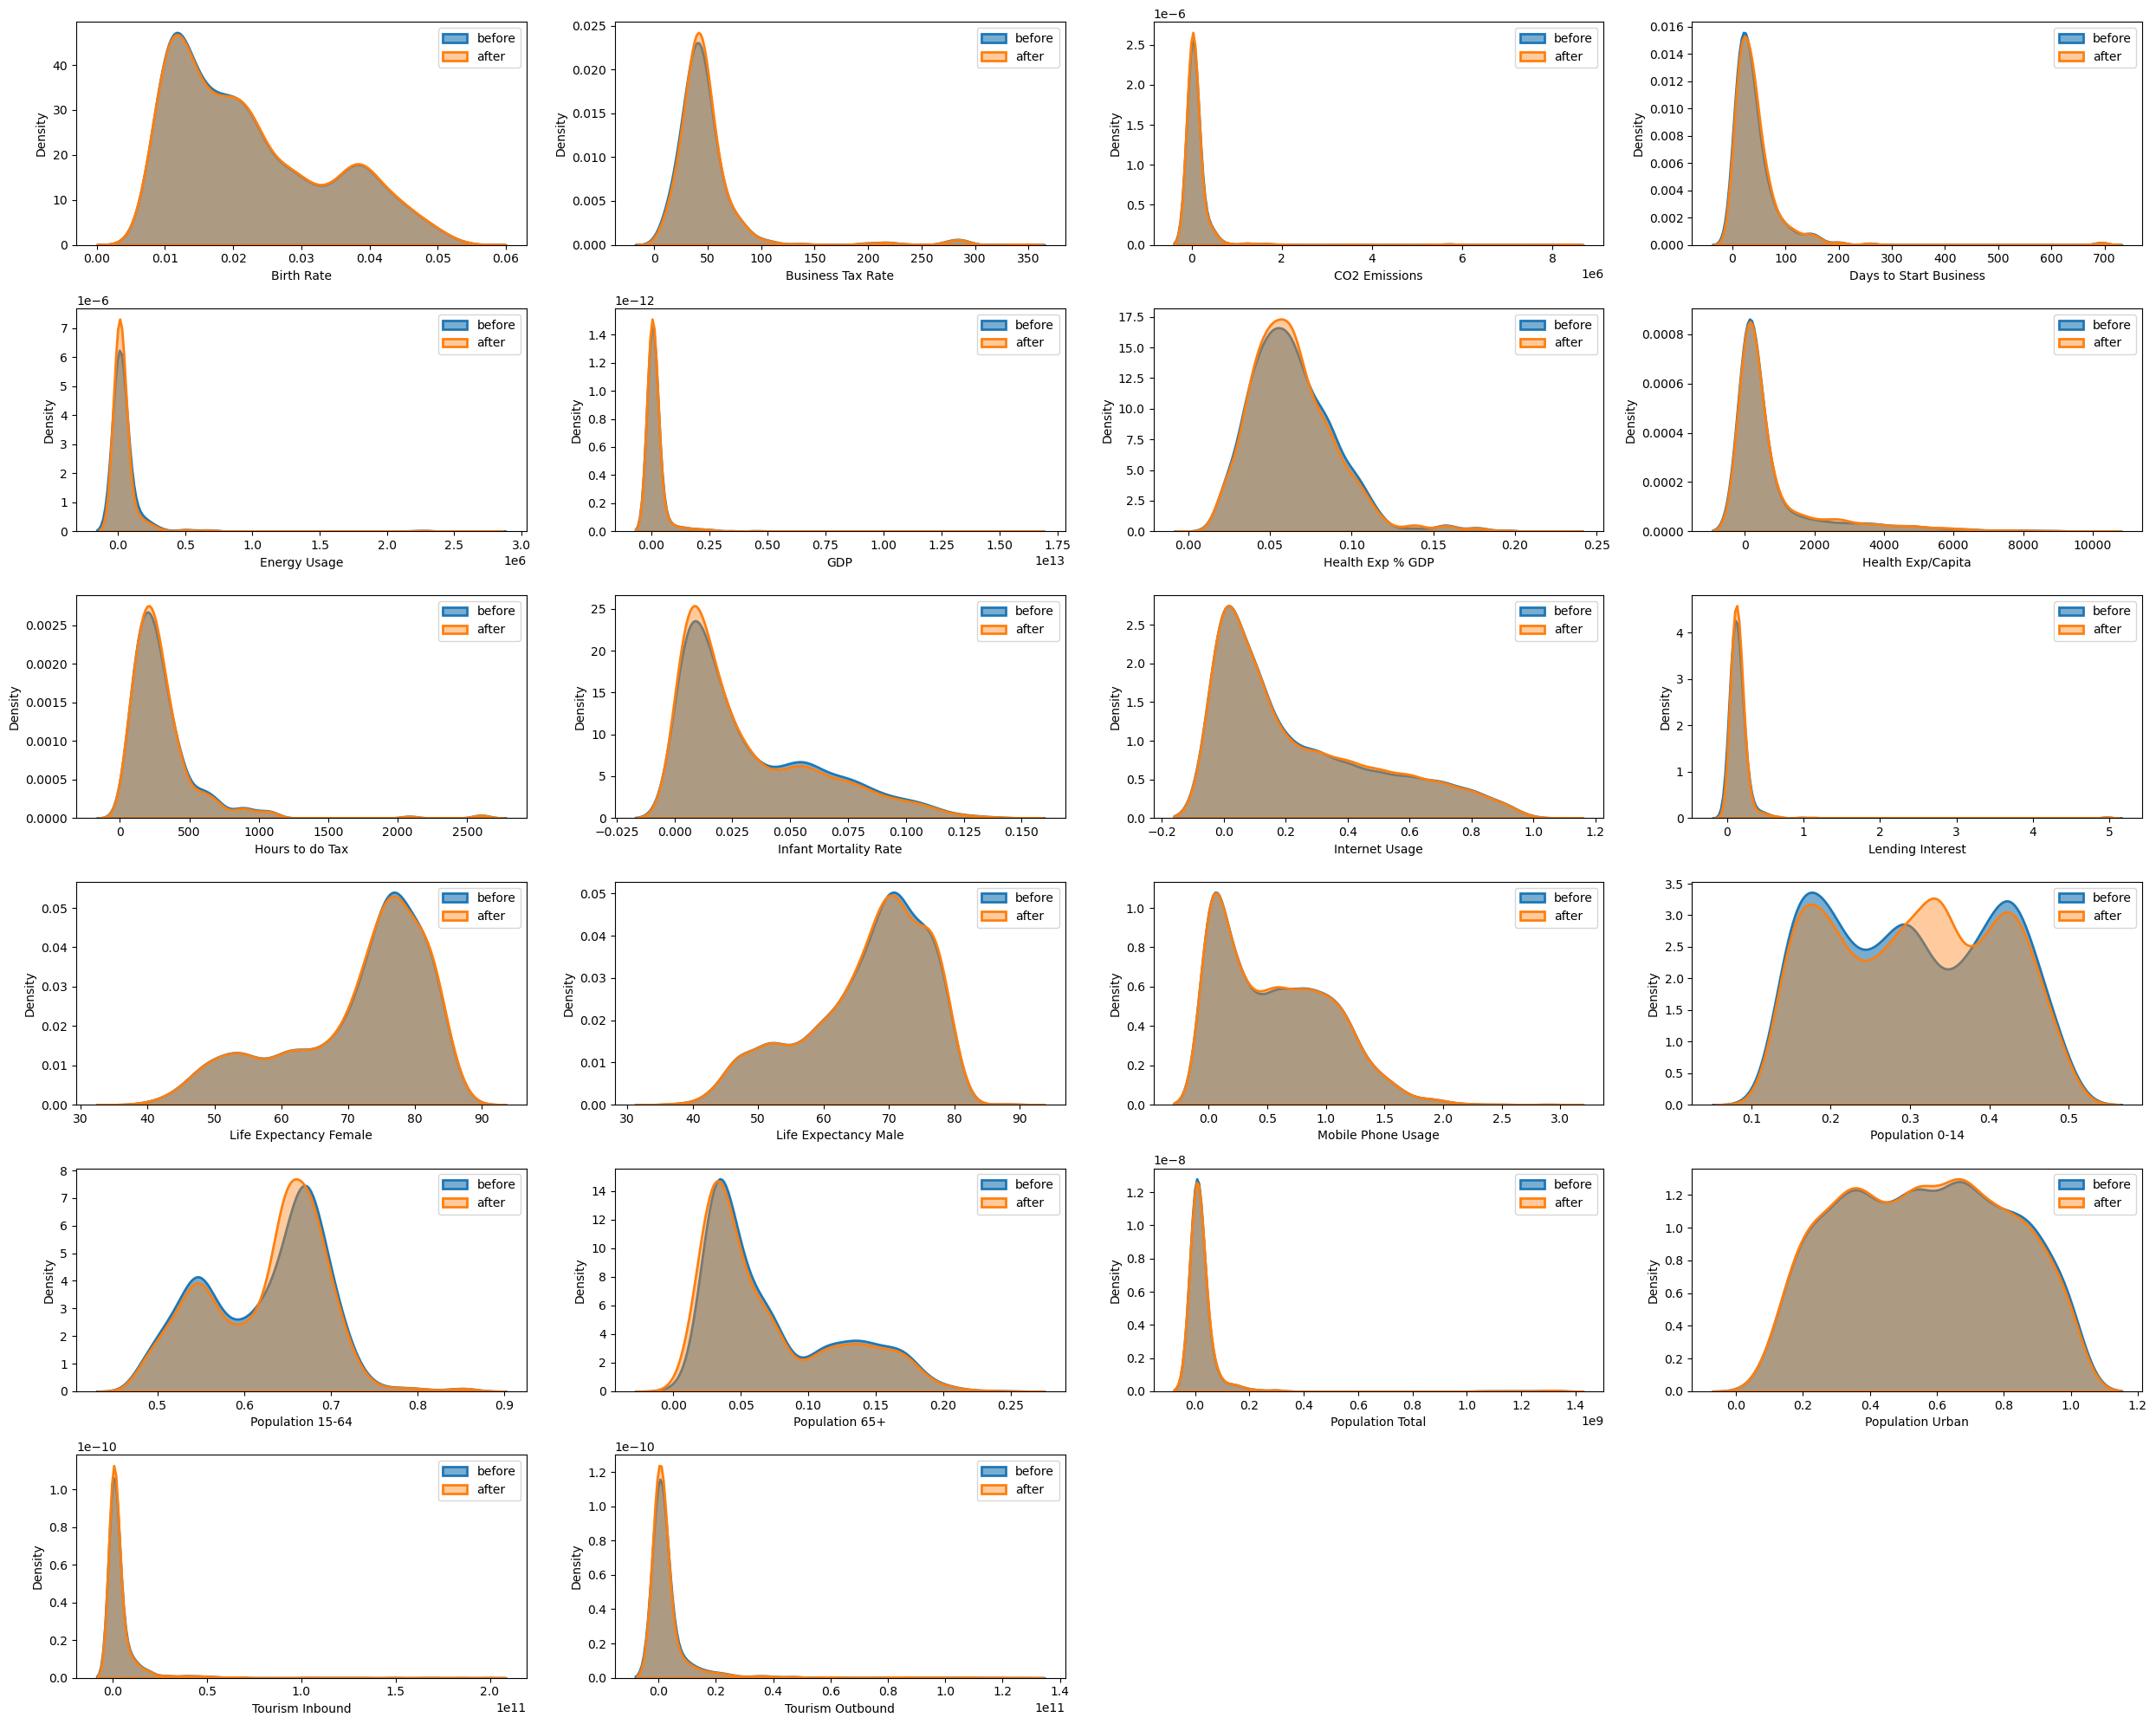

In [69]:
fig = plt.figure(figsize=(25, 20))

for i, j in enumerate(X.columns):
    
    ax = plt.subplot(6, 4, i + 1)
    sns.kdeplot(df1[j], label="before", fill=True, alpha=0.6, linewidth=2,)
    sns.kdeplot(clean_df[j], label="after", fill=True, alpha=0.4, linewidth=2)
    plt.legend()
    


plt.tight_layout()
plt.show()

In [70]:
final_df = pd.concat([y, clean_df], axis =1)

In [71]:
final_df['year'] = pd.to_datetime(final_df['year'], format='%Y').dt.year

In [72]:
final_df.to_csv("cleaned.csv")